In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
!pip install arch

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 983.0/983.0 kB 5.1 MB/s eta 0:00:00


In [3]:
%matplotlib inline

import pandas as pd
import pandas_datareader.data as web

import numpy as np
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import acf, q_stat, adfuller

from sklearn.metrics import mean_squared_error

from scipy.stats import probplot, moment

from arch import arch_model
from arch.univariate import ConstantMean, GARCH, Normal

import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
sns.set_style('whitegrid')


In [18]:
def plot_correlogram(x, lags=None, title=None):
    lags = min(10, int(len(x)/5)) if lags is None else lags
    fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(14, 8))
    x.plot(ax=axes[0][0], title='Residuals')
    x.rolling(21).mean().plot(ax=axes[0][0], c='k', lw=1)
    q_p = np.max(q_stat(acf(x, nlags=lags), len(x))[1])
    stats = f'Q-Stat: {np.max(q_p):>8.2f}\nADF: {adfuller(x)[1]:>11.2f}'
    axes[0][0].text(x=.02, y=.85, s=stats, transform=axes[0][0].transAxes)
    probplot(x, plot=axes[0][1])
    mean, var, skew, kurtosis = moment(x, moment=[1, 2, 3, 4])
    s = f'Mean: {mean:>12.2f}\nSD: {np.sqrt(var):>16.2f}\nSkew: {skew:12.2f}\nKurtosis:{kurtosis:9.2f}'
    axes[0][1].text(x=.02, y=.75, s=s, transform=axes[0][1].transAxes)
    plot_acf(x=x, lags=lags, zero=False, ax=axes[1][0])
    plot_pacf(x, lags=lags, zero=False, ax=axes[1][1])
    axes[1][0].set_xlabel('Lag')
    axes[1][1].set_xlabel('Lag')
    fig.suptitle(title, fontsize=14)
    sns.despine()
    fig.tight_layout()
    fig.subplots_adjust(top=.9)

In [ ]:
nasdaq = web.DataReader('NASDAQCOM', 'fred', '2000', '2020').squeeze()
nasdaq_returns = np.log(nasdaq).diff().dropna().mul(100) # rescale to faciliate optimization

In [ ]:
print(nasdaq_returns)

DATE
2000-01-04   -5.714603
2000-01-05   -0.620886
2000-01-06   -3.956243
2000-01-07    4.087168
2000-01-10    4.212521
                ...   
2019-12-23    0.231553
2019-12-24    0.080789
2019-12-27   -0.174940
2019-12-30   -0.675448
2019-12-31    0.297010
Name: NASDAQCOM, Length: 4851, dtype: float64


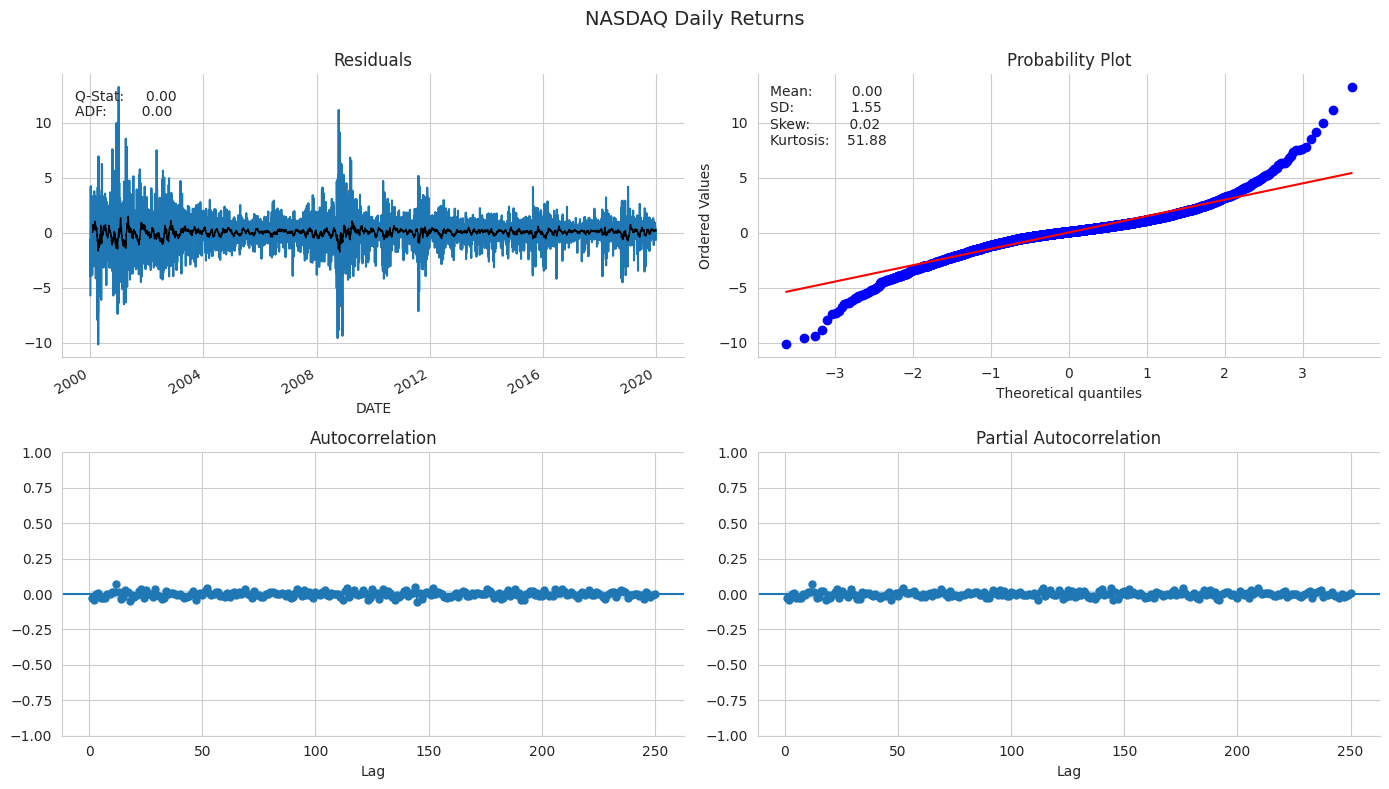

In [ ]:
plot_correlogram(nasdaq_returns, lags=250, title='NASDAQ Daily Returns')


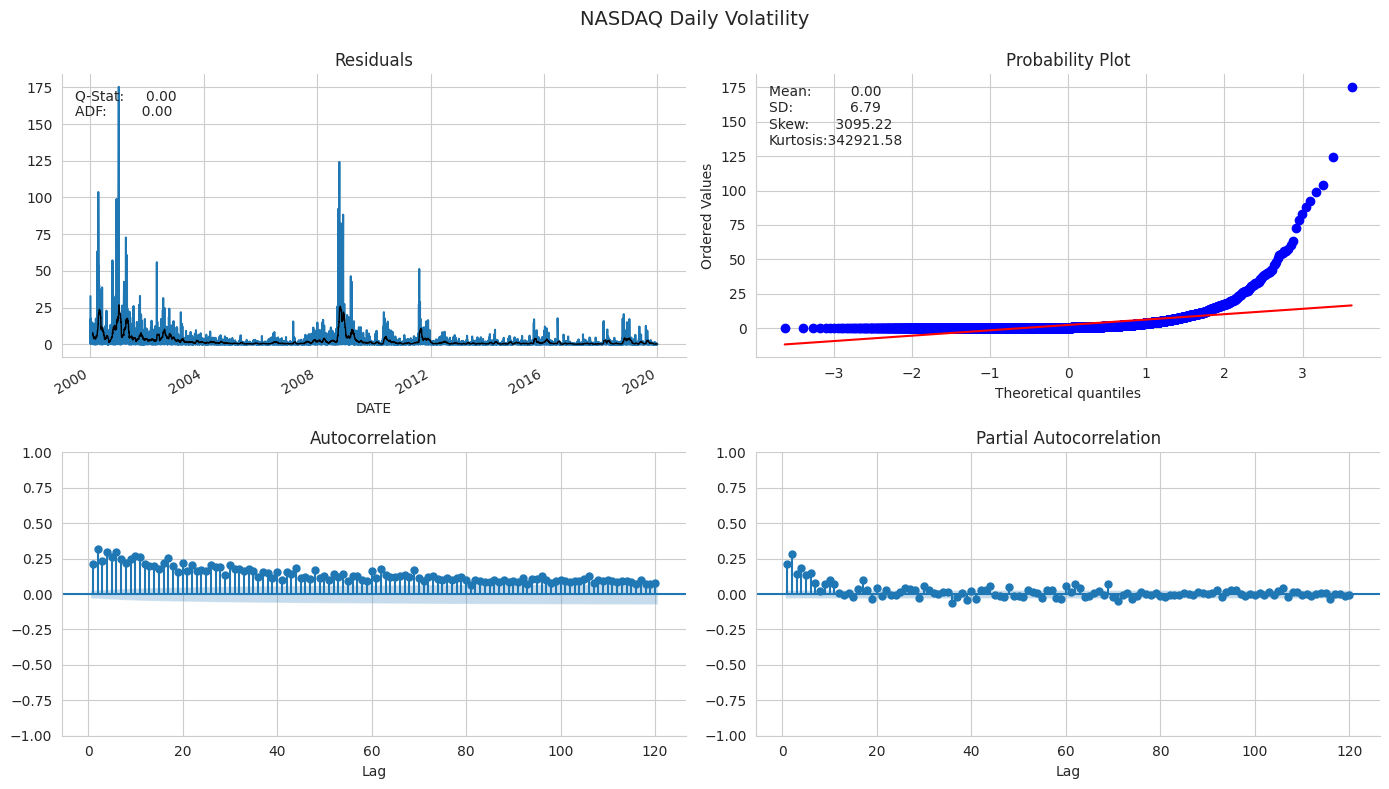

In [ ]:
plot_correlogram(nasdaq_returns.sub(nasdaq_returns.mean()).pow(2), lags=120, title='NASDAQ Daily Volatility')


## CNY USD

## Get historical data

In [7]:
import requests
from pprint import PrettyPrinter

api_key = #

url = "https://marketdata.tradermade.com/api/v1/timeseries?"
currency="USDCNY"
start_date="2023-03-19"
end_date="2024-03-19"
format="split"
interval="daily"
df=pd.read_json('https://marketdata.tradermade.com/api/v1/timeseries?currency='+currency+'&api_key='+api_key+'&start_date='+start_date+'&end_date='+end_date+'&format='+format+'&interval='+interval)
df_2023 = pd.DataFrame(df.quotes['data'], columns=df.quotes['columns'])


In [8]:
start_date="2022-03-19"
end_date="2023-03-18"
format="split"
interval="daily"
df=pd.read_json('https://marketdata.tradermade.com/api/v1/timeseries?currency='+currency+'&api_key='+api_key+'&start_date='+start_date+'&end_date='+end_date+'&format='+format+'&interval='+interval)
df_2022 = pd.DataFrame(df.quotes['data'], columns=df.quotes['columns'])


In [9]:
start_date="2021-03-19"
end_date="2022-03-18"
format="split"
interval="daily"
df=pd.read_json('https://marketdata.tradermade.com/api/v1/timeseries?currency='+currency+'&api_key='+api_key+'&start_date='+start_date+'&end_date='+end_date+'&format='+format+'&interval='+interval)
df_2021 = pd.DataFrame(df.quotes['data'], columns=df.quotes['columns'])


In [10]:
start_date="2020-03-19"
end_date="2021-03-18"
format="split"
interval="daily"
df=pd.read_json('https://marketdata.tradermade.com/api/v1/timeseries?currency='+currency+'&api_key='+api_key+'&start_date='+start_date+'&end_date='+end_date+'&format='+format+'&interval='+interval)
df_2020 = pd.DataFrame(df.quotes['data'], columns=df.quotes['columns'])


In [11]:
start_date="2019-03-19"
end_date="2020-03-18"
format="split"
interval="daily"
df=pd.read_json('https://marketdata.tradermade.com/api/v1/timeseries?currency='+currency+'&api_key='+api_key+'&start_date='+start_date+'&end_date='+end_date+'&format='+format+'&interval='+interval)
df_2019 = pd.DataFrame(df.quotes['data'], columns=df.quotes['columns'])


In [12]:
start_date="2018-03-19"
end_date="2019-03-18"
format="split"
interval="daily"
df=pd.read_json('https://marketdata.tradermade.com/api/v1/timeseries?currency='+currency+'&api_key='+api_key+'&start_date='+start_date+'&end_date='+end_date+'&format='+format+'&interval='+interval)
df_2018 = pd.DataFrame(df.quotes['data'], columns=df.quotes['columns'])


In [13]:
df = pd.concat([ df_2018, df_2019, df_2020, df_2021, df_2022, df_2023], ignore_index=True).drop_duplicates()

## config

In [14]:
aggregate_week = True
take_log_ret = False
use_diff = False

In [15]:
df['date'] = pd.to_datetime(df['date'])
df.sort_values('date', inplace=True)
df.set_index('date', inplace=True)

print(df.shape)

df.head()
if aggregate_week:
  df_week = df.resample('w').mean()[['close']]
else:
  df_week = df[['close']]
print(df_week)

(1387, 4)
               close
date                
2018-03-25  6.327072
2018-04-01  6.278530
2018-04-08  6.296716
2018-04-15  6.285768
2018-04-22  6.281564
...              ...
2024-02-25  7.193820
2024-03-03  7.195580
2024-03-10  7.194730
2024-03-17  7.188662
2024-03-24  7.198750

[314 rows x 1 columns]


               close  weekly_ret
date                            
2018-03-25  6.327072    6.327072
2018-04-01  6.278530    6.278530
2018-04-08  6.296716    6.296716
2018-04-15  6.285768    6.285768
2018-04-22  6.281564    6.281564
...              ...         ...
2024-02-25  7.193820    7.193820
2024-03-03  7.195580    7.195580
2024-03-10  7.194730    7.194730
2024-03-17  7.188662    7.188662
2024-03-24  7.198750    7.198750

[279 rows x 2 columns]


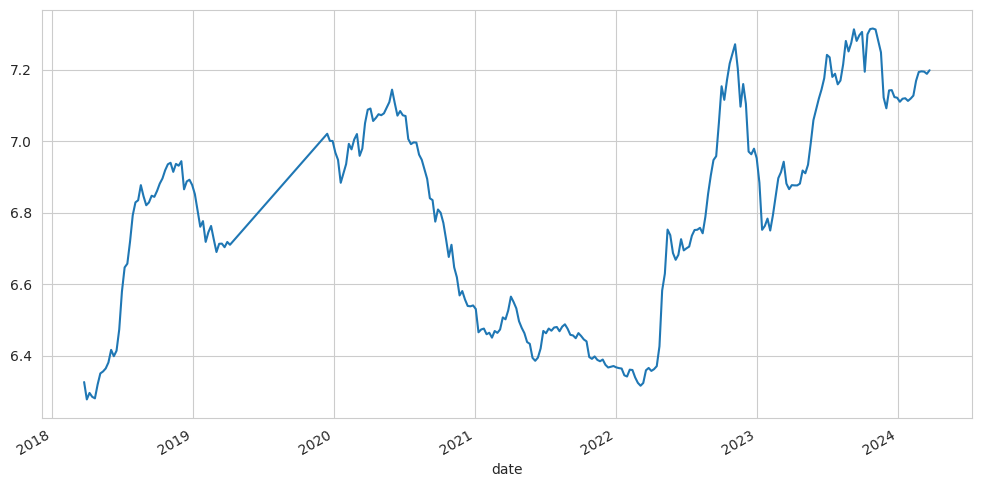

In [16]:

df_week['weekly_ret'] = df_week['close']
if take_log_ret:
  df_week['weekly_ret'] = np.log(df_week['weekly_ret'])
if use_diff:
  df_week['weekly_ret'] = df_week['weekly_ret'].diff()
# df_week['weekly_ret'] =  np.log(df_week['close'])
# drop null rows (first week 03/05)
df_week.dropna(inplace=True)
print(df_week)
df_week.weekly_ret.plot(kind='line', figsize=(12, 6));

## Plot correlogram

### $diff(log(close\_price))$

            weekly_ret
date                  
2018-03-25    6.327072
2018-04-01    6.278530
2018-04-08    6.296716
2018-04-15    6.285768
2018-04-22    6.281564
...                ...
2024-02-25    7.193820
2024-03-03    7.195580
2024-03-10    7.194730
2024-03-17    7.188662
2024-03-24    7.198750

[279 rows x 1 columns]


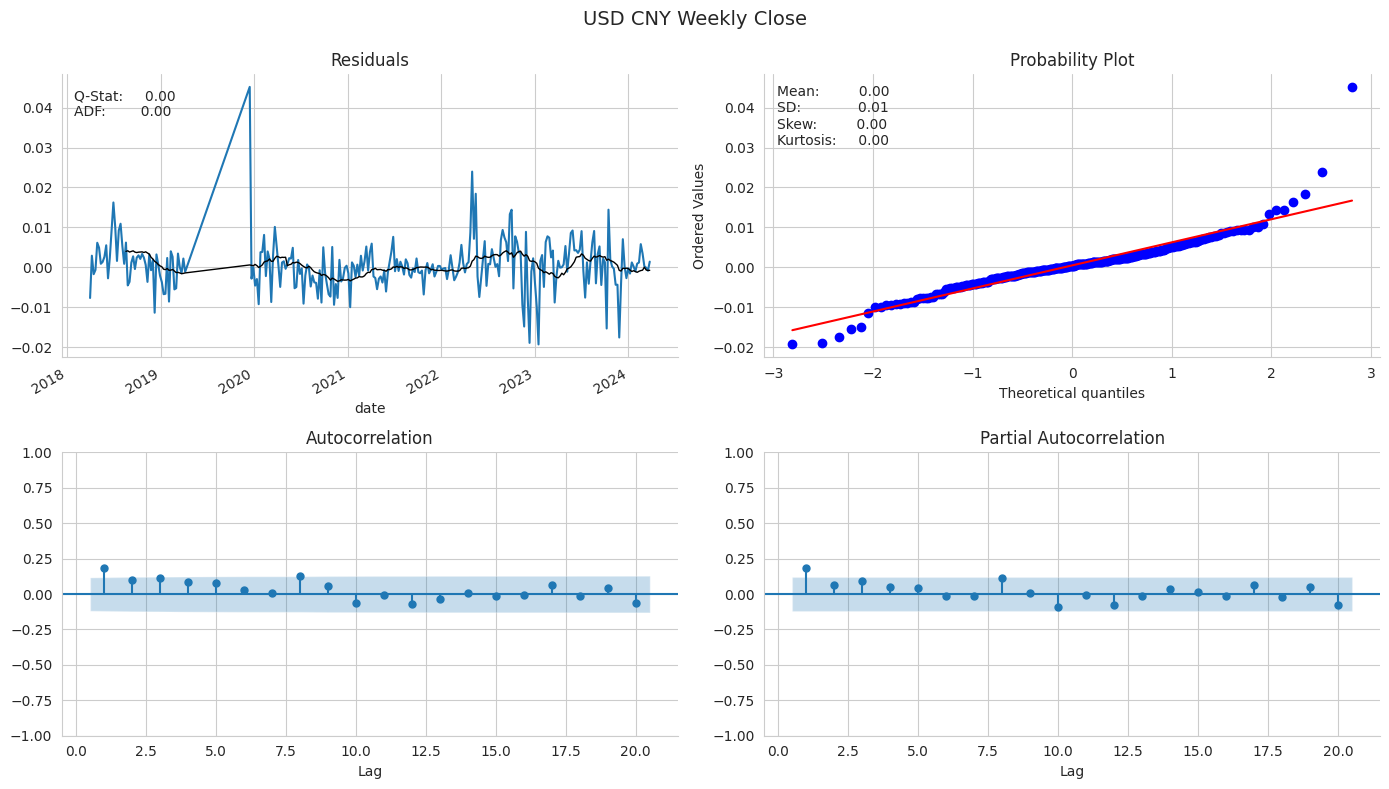

In [19]:
# drop the close column
udiff = df_week.drop(['close'], axis=1)
udiff.head()
print(udiff)
c = udiff['weekly_ret']
plot_correlogram(np.log(c).diff().dropna(), lags=20, title='USD CNY Weekly Close')


#### ACF/PACF cutoff

According to the book *Machine Learning for Algorithmic Trading - Second Edition*,

1. the lag beyond which the PACF cutoff is the *p* for AR terms.
2. the lag beyond which the ACF cutoff is the *q* for MA terms.

$p\approx 10$, $q\approx 10$


#### squared deviations from the mean - variance $\sigma_t$ of the error term $ϵ_t$

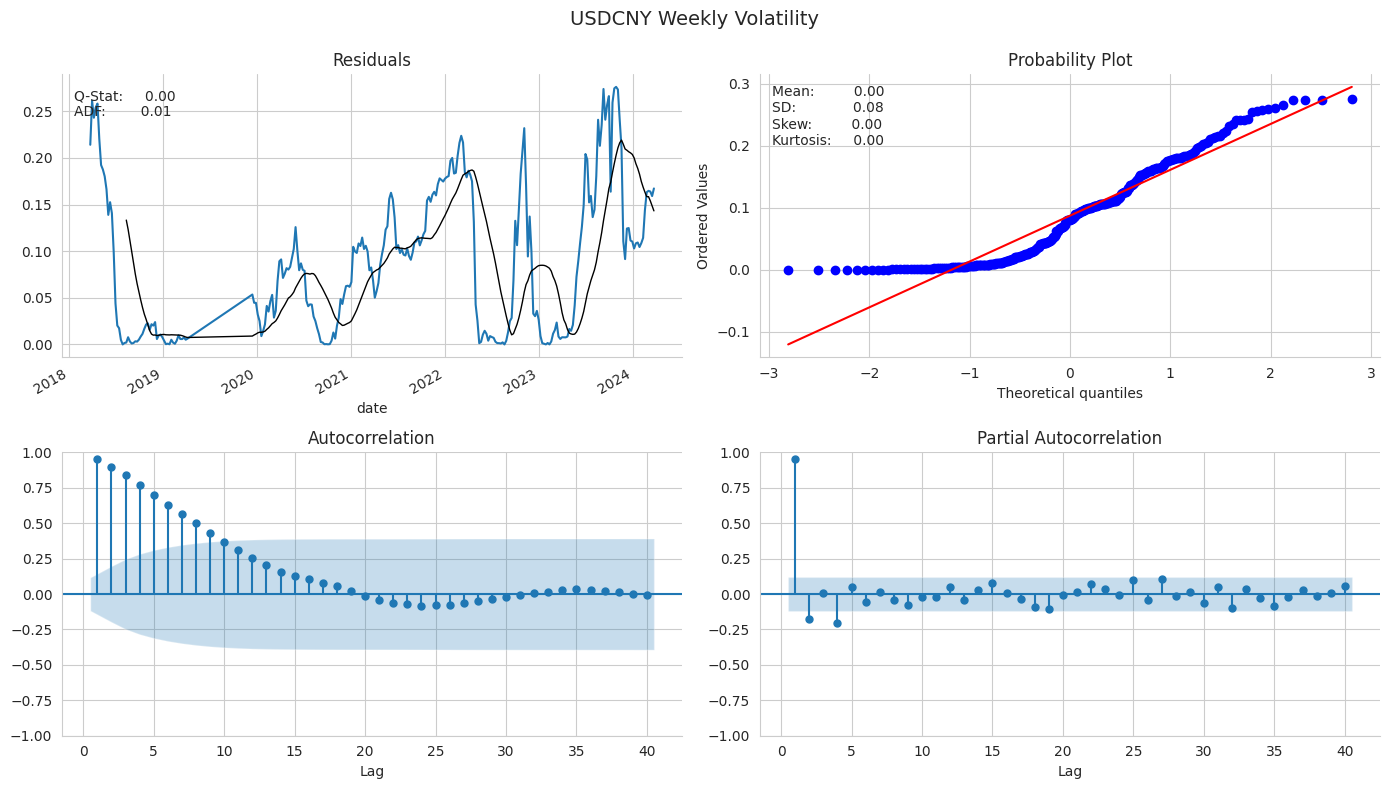

In [22]:
plot_correlogram(c.sub(c.mean()).pow(2), lags=40, title='USDCNY Weekly Volatility')


#### ACF/PACF cutoff

$p\approx 5$, $q \approx 20$. Though one should note that the PACF cutoff is not that clear-cut.

In [23]:
from sklearn.metrics import mean_squared_error
import numpy as np

## Generate random sampling $z_t$ $\sim $ $i.i.d$ $i.e.$ $\mathcal{N}(0,1)$

In [24]:


# Set the number of samples you want to generate
num_samples = 1000

# Generate i.i.d. samples from N(0, 1)
samples = np.random.normal(0, 1, num_samples)

# Print the first few samples
print(samples[:10])  # Print the first 10 samples as an example

[ 0.44264663 -0.83207449 -2.98866115  0.99914696 -1.06548059 -0.90056019
 -0.17680031  1.07298498 -2.17159385 -0.05984114]


#  $\min ||r_t - (\hat{\mu}_t + z_t \hat{\sigma}_t)||_2 $

### grid search

use a $trainsize-week rolling window

generate one-step out-of-sample forecast

get the one with least RMSE between actual mean and sampled mean (by sampling noise and adding predicted variance)

In [56]:

data = c.clip(lower=c.quantile(.05),
                           upper=c.quantile(.95))
print(data)
T = len(data)
trainsize = T - 2
print(T)
results = {}

p_sets = [1, 2, 3, 4, 5]
q_sets = [19, 20, 21]
for p in p_sets:
    for q in q_sets:
        print(f'[INFO] grid searching {p} | {q}')
        result = []
        i = 0
        for s, t in enumerate(range(trainsize, T - 1)):
            train_set = data.iloc[s: t]
            test_set = data.iloc[t + 1]  # 1-step ahead forecast: GT

            # assume p, q for the residual and variance term
            print("[INFO] {:3d} {:3d} | {:3d} | train [{:5d}-{:5d}] | test {:5d}".format(p, q, i, s, t, t + 1))
            model = arch_model(y=train_set, p=p, q=q).fit(disp='off')
            forecast = model.forecast(horizon=1)
            mu = forecast.mean.iloc[-1, 0]
            var = forecast.variance.iloc[-1, 0]
            print("[INFO]                      test_true {:.6f}      mu {:.6f} | var {:.6f} ".format(test_set, mu, var))

            y_true = (test_set-mu)**2 #actual variance
            y_pred = var              #predicted variance: $\sigma_t$ by GARCH
            print("[INFO]  Variance    [actual]   y_true {:.6f}    \sigma_t   y_pred {:.6f}".format(y_true, y_pred))

            # Random sample a noise like diffusion $x_t = \alpha_t x_0 + \epsilon \sigma_t$ where $\epsilon$ here is the noise term
            eps = np.random.normal(0, 1, 1)[0]
            # r_t = \eps_t + \mu = \sigma_t * z_t + \mu = pred_var * eps + pred_mu
            rt = mu + eps * var
            print("[INFO]  Noise       [actual]       mu {:.6f}              mu_pred {:.6f} ======= | abs(diff) {:.6f}".format(test_set, rt, abs(rt - test_set)))
            result.append([y_true, y_pred])
            i += 1
        df = pd.DataFrame(result, columns=['y_true', 'y_pred'])
        print("====================\n\n[INFO] p={:3d}, q={:3d}, df is================================\n".format(p, q))
        print(df)
        print("====================\n\n")
        # L2 squared error on (actual - mu)**2, (predicted variance)
        # (actual variance, predicted variance)
        results[(p, q)] = np.sqrt(mean_squared_error(df.y_true, df.y_pred))

date
2018-03-25    6.358066
2018-04-01    6.358066
2018-04-08    6.358066
2018-04-15    6.358066
2018-04-22    6.358066
                ...   
2024-02-25    7.193820
2024-03-03    7.195580
2024-03-10    7.194730
2024-03-17    7.188662
2024-03-24    7.198750
Name: weekly_ret, Length: 279, dtype: float64
279
[INFO] grid searching 1 | 19
[INFO]   1  19 |   0 | train [    0-  277] | test   278
[INFO]                      test_true 7.198750      mu 6.878997 | var 0.098411 
[INFO]  Variance    [actual]   y_true 0.102242    \sigma_t   y_pred 0.098411
[INFO]  Noise       [actual]       mu 7.198750              mu_pred 7.016107 ======= | abs(diff) 0.182643

[INFO] p=  1, q= 19, df is================================

     y_true    y_pred
0  0.102242  0.098411


[INFO] grid searching 1 | 20
[INFO]   1  20 |   0 | train [    0-  277] | test   278


/usr/local/lib/python3.10/dist-packages/arch/univariate/base.py:766: ConvergenceWarning: The optimizer returned code 8. The message is:
Positive directional derivative for linesearch
See scipy.optimize.fmin_slsqp for code meaning.

  warnings.warn(


[INFO]                      test_true 7.198750      mu 6.878995 | var 0.098451 
[INFO]  Variance    [actual]   y_true 0.102243    \sigma_t   y_pred 0.098451
[INFO]  Noise       [actual]       mu 7.198750              mu_pred 6.870873 ======= | abs(diff) 0.327877

[INFO] p=  1, q= 20, df is================================

     y_true    y_pred
0  0.102243  0.098451


[INFO] grid searching 1 | 21
[INFO]   1  21 |   0 | train [    0-  277] | test   278
[INFO]                      test_true 7.198750      mu 6.878996 | var 0.098412 
[INFO]  Variance    [actual]   y_true 0.102243    \sigma_t   y_pred 0.098412
[INFO]  Noise       [actual]       mu 7.198750              mu_pred 6.899341 ======= | abs(diff) 0.299409

[INFO] p=  1, q= 21, df is================================

     y_true    y_pred
0  0.102243  0.098412


[INFO] grid searching 2 | 19
[INFO]   2  19 |   0 | train [    0-  277] | test   278
[INFO]                      test_true 7.198750      mu 6.878996 | var 0.098411 
[INFO]  Va

/usr/local/lib/python3.10/dist-packages/arch/univariate/base.py:766: ConvergenceWarning: The optimizer returned code 8. The message is:
Positive directional derivative for linesearch
See scipy.optimize.fmin_slsqp for code meaning.

  warnings.warn(


[INFO]                      test_true 7.198750      mu 6.878997 | var 0.098416 
[INFO]  Variance    [actual]   y_true 0.102242    \sigma_t   y_pred 0.098416
[INFO]  Noise       [actual]       mu 7.198750              mu_pred 7.043744 ======= | abs(diff) 0.155006

[INFO] p=  2, q= 21, df is================================

     y_true    y_pred
0  0.102242  0.098416


[INFO] grid searching 3 | 19
[INFO]   3  19 |   0 | train [    0-  277] | test   278
[INFO]                      test_true 7.198750      mu 6.878978 | var 0.098422 
[INFO]  Variance    [actual]   y_true 0.102254    \sigma_t   y_pred 0.098422
[INFO]  Noise       [actual]       mu 7.198750              mu_pred 6.954027 ======= | abs(diff) 0.244723

[INFO] p=  3, q= 19, df is================================

     y_true    y_pred
0  0.102254  0.098422


[INFO] grid searching 3 | 20
[INFO]   3  20 |   0 | train [    0-  277] | test   278
[INFO]                      test_true 7.198750      mu 6.878995 | var 0.098412 
[INFO]  Va

### vis

In [57]:
print(results)

{(1, 19): 0.003831309616428913, (1, 20): 0.0037927188066520234, (1, 21): 0.0038311386874261832, (2, 19): 0.0038311171357253843, (2, 20): 0.0038313007389420284, (2, 21): 0.0038266453608977874, (3, 19): 0.0038326139186208447, (3, 20): 0.003831141185867193, (3, 21): 0.003831299839235039, (4, 19): 0.010162915776444431, (4, 20): 0.0038309994971639505, (4, 21): 0.003830900927117062, (5, 19): 0.0038306826385756665, (5, 20): 0.01316196362857354, (5, 21): 0.003830786939507211}


In [58]:
s = pd.Series(results)
s.index.names = ['p', 'q']
s = s.unstack().sort_index(ascending=False)
print(s)
# best p = 1, q = 20

q        19        20        21
p                              
5  0.003831  0.013162  0.003831
4  0.010163  0.003831  0.003831
3  0.003833  0.003831  0.003831
2  0.003831  0.003831  0.003827
1  0.003831  0.003793  0.003831


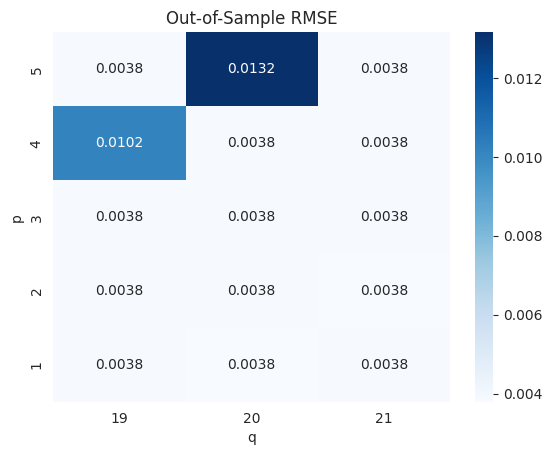

In [59]:
sns.heatmap(s, cmap='Blues', annot=True, fmt='.4f')
plt.title('Out-of-Sample RMSE');

In [33]:
best_p, best_q = 5, 20


### Estimate Best GARCH Model


The output shows the maximized log-likelihood as well as the AIC and BIC criteria that are commonly minimized when selecting models based on in-sample performance (see Chapter 7, Linear Models). It also displays the result for the mean model, which in this case is just a constant estimate, as well as the GARCH parameters for the constant omega, the AR parameters, α, and the MA parameters, β, all of which are statistically significant:

In [61]:
am = ConstantMean(c.clip(lower=c.quantile(.05),
                                      upper=c.quantile(.95)))
am.volatility = GARCH(best_p, 0, best_q)
am.distribution = Normal()
best_model = am.fit(update_freq=5)
print(best_model.summary())


Iteration:      5,   Func. Count:    149,   Neg. LLF: 55.93769991210527
Iteration:     10,   Func. Count:    299,   Neg. LLF: 152876030.58157253
Iteration:     15,   Func. Count:    444,   Neg. LLF: -50.49694346555031
Iteration:     20,   Func. Count:    589,   Neg. LLF: -57.92166087524204
Iteration:     25,   Func. Count:    745,   Neg. LLF: 89.43526651872499
Iteration:     30,   Func. Count:    905,   Neg. LLF: -57.92817368293243
Optimization terminated successfully    (Exit mode 0)
            Current function value: -57.92817368293243
            Iterations: 35
            Function evaluations: 932
            Gradient evaluations: 31
                     Constant Mean - GARCH Model Results                      
Dep. Variable:             weekly_ret   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:                57.9282
Distribution:                  Normal

In [64]:
forecast = best_model.forecast(horizon=2)
mu = forecast.mean
print(mu)

var = forecast.variance
print(var)

                 h.1       h.2
date                          
2024-03-24  6.879256  6.879256
                 h.1       h.2
date                          
2024-03-24  0.100937  0.100598


In [53]:
print(c)

date
2018-03-25    6.327072
2018-04-01    6.278530
2018-04-08    6.296716
2018-04-15    6.285768
2018-04-22    6.281564
                ...   
2024-02-25    7.193820
2024-03-03    7.195580
2024-03-10    7.194730
2024-03-17    7.188662
2024-03-24    7.198750
Name: weekly_ret, Length: 279, dtype: float64


In [71]:
print(best_p, " " , best_q)

5   20


In [72]:
print(c)

date
2018-03-25    6.327072
2018-04-01    6.278530
2018-04-08    6.296716
2018-04-15    6.285768
2018-04-22    6.281564
                ...   
2024-02-25    7.193820
2024-03-03    7.195580
2024-03-10    7.194730
2024-03-17    7.188662
2024-03-24    7.198750
Name: weekly_ret, Length: 279, dtype: float64


In [77]:


data = c.clip(lower=c.quantile(.05),
                           upper=c.quantile(.95))
print(data)
T = len(data)
trainsize = 40  # 10 weeks
print(T)
results_list = []


test_set_list = []
mu_list = []



for s, t in enumerate(range(trainsize, T-1)):
    train_set = data.iloc[s: t]
    test_set = data.iloc[t+1]  # 1-step a

    #am = ConstantMean(train_set.clip(lower=train_set.quantile(.05),
                                          #upper=train_set.quantile(.95)))
    #am.volatility = GARCH(best_p, 0, best_q)
    #am.distribution = Normal()
    #model = am.fit(update_freq=5)

    model = arch_model(y=train_set, p=best_p, q=best_q).fit(disp='off')
    forecast = model.forecast(horizon=1)
    mu = forecast.mean.iloc[-1, 0]
    var = forecast.variance.iloc[-1, 0]


    print(model.summary())
    print("[INFO] {:3d} - {:3d}".format(s, t))
    print("[INFO]              test_true {:.6f}       mu {:.6f} | var {:.6f} ".format(test_set, mu, var))
    y_true = (test_set-mu)**2
    y_pred = var
    print("[INFO]  Variance       y_true {:.6f}   y_pred {:.6f}".format(y_true, y_pred))

    eps = np.random.normal(0, 1, 1)[0]
    # r_t = \eps_t + \mu = \sigma_t * z_t + \mu = pred_var * eps + pred_mu
    rt = mu + eps * var
    print("[INFO]                    eps {:.6f}       mu {:.6f} | var {:.6f} | mu {:.6f} ======= actual {:.6f} | abs(diff) {:.6f}".format(eps, mu, var, rt, test_set, abs(rt - test_set)))
    results_list.append([(test_set-mu)**2, var])

    test_set_list.append(test_set)
    mu_list.append(mu)


date
2018-03-25    6.358066
2018-04-01    6.358066
2018-04-08    6.358066
2018-04-15    6.358066
2018-04-22    6.358066
                ...   
2024-02-25    7.193820
2024-03-03    7.195580
2024-03-10    7.194730
2024-03-17    7.188662
2024-03-24    7.198750
Name: weekly_ret, Length: 279, dtype: float64
279
                     Constant Mean - GARCH Model Results                      
Dep. Variable:             weekly_ret   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:                28.4791
Distribution:                  Normal   AIC:                          -2.95810
Method:            Maximum Likelihood   BIC:                           42.6416
                                        No. Observations:                   40
Date:                Tue, Mar 19 2024   Df Residuals:                       39
Time:                        17:17:03   Df Model:           

/usr/local/lib/python3.10/dist-packages/arch/univariate/base.py:766: ConvergenceWarning: The optimizer returned code 8. The message is:
Positive directional derivative for linesearch
See scipy.optimize.fmin_slsqp for code meaning.

  warnings.warn(


                     Constant Mean - GARCH Model Results                      
Dep. Variable:             weekly_ret   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:                49.8192
Distribution:                  Normal   AIC:                          -45.6383
Method:            Maximum Likelihood   BIC:                        -0.0385859
                                        No. Observations:                   40
Date:                Tue, Mar 19 2024   Df Residuals:                       39
Time:                        17:17:21   Df Model:                            1
                               Mean Model                               
                 coef    std err          t      P>|t|  95.0% Conf. Int.
------------------------------------------------------------------------
mu             6.9191  6.723e-02    102.912      0.000 [  6.787,  7.05

/usr/local/lib/python3.10/dist-packages/arch/univariate/base.py:766: ConvergenceWarning: The optimizer returned code 8. The message is:
Positive directional derivative for linesearch
See scipy.optimize.fmin_slsqp for code meaning.

  warnings.warn(


                     Constant Mean - GARCH Model Results                      
Dep. Variable:             weekly_ret   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:                43.7975
Distribution:                  Normal   AIC:                          -33.5949
Method:            Maximum Likelihood   BIC:                           12.0048
                                        No. Observations:                   40
Date:                Tue, Mar 19 2024   Df Residuals:                       39
Time:                        17:17:27   Df Model:                            1
                               Mean Model                               
                 coef    std err          t      P>|t|  95.0% Conf. Int.
------------------------------------------------------------------------
mu             7.0763  1.403e-02    504.239      0.000 [  7.049,  7.10

/usr/local/lib/python3.10/dist-packages/arch/univariate/base.py:766: ConvergenceWarning: The optimizer returned code 8. The message is:
Positive directional derivative for linesearch
See scipy.optimize.fmin_slsqp for code meaning.

  warnings.warn(


                     Constant Mean - GARCH Model Results                      
Dep. Variable:             weekly_ret   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:                58.5099
Distribution:                  Normal   AIC:                          -63.0198
Method:            Maximum Likelihood   BIC:                          -17.4200
                                        No. Observations:                   40
Date:                Tue, Mar 19 2024   Df Residuals:                       39
Time:                        17:17:34   Df Model:                            1
                               Mean Model                               
                 coef    std err          t      P>|t|  95.0% Conf. Int.
------------------------------------------------------------------------
mu             6.9974  2.784e-03   2513.570      0.000 [  6.992,  7.00

/usr/local/lib/python3.10/dist-packages/arch/univariate/base.py:766: ConvergenceWarning: The optimizer returned code 8. The message is:
Positive directional derivative for linesearch
See scipy.optimize.fmin_slsqp for code meaning.

  warnings.warn(


                     Constant Mean - GARCH Model Results                      
Dep. Variable:             weekly_ret   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:                56.0022
Distribution:                  Normal   AIC:                          -58.0044
Method:            Maximum Likelihood   BIC:                          -12.4046
                                        No. Observations:                   40
Date:                Tue, Mar 19 2024   Df Residuals:                       39
Time:                        17:17:34   Df Model:                            1
                               Mean Model                               
                 coef    std err          t      P>|t|  95.0% Conf. Int.
------------------------------------------------------------------------
mu             6.9967  2.280e-03   3069.405      0.000 [  6.992,  7.00

/usr/local/lib/python3.10/dist-packages/arch/univariate/base.py:766: ConvergenceWarning: The optimizer returned code 8. The message is:
Positive directional derivative for linesearch
See scipy.optimize.fmin_slsqp for code meaning.

  warnings.warn(


                     Constant Mean - GARCH Model Results                      
Dep. Variable:             weekly_ret   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:                51.4954
Distribution:                  Normal   AIC:                          -48.9907
Method:            Maximum Likelihood   BIC:                          -3.39096
                                        No. Observations:                   40
Date:                Tue, Mar 19 2024   Df Residuals:                       39
Time:                        17:17:35   Df Model:                            1
                               Mean Model                               
                 coef    std err          t      P>|t|  95.0% Conf. Int.
------------------------------------------------------------------------
mu             6.9972  2.504e-03   2794.770      0.000 [  6.992,  7.00

/usr/local/lib/python3.10/dist-packages/arch/univariate/base.py:766: ConvergenceWarning: The optimizer returned code 8. The message is:
Positive directional derivative for linesearch
See scipy.optimize.fmin_slsqp for code meaning.

  warnings.warn(


                     Constant Mean - GARCH Model Results                      
Dep. Variable:             weekly_ret   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:                49.4880
Distribution:                  Normal   AIC:                          -44.9759
Method:            Maximum Likelihood   BIC:                          0.623817
                                        No. Observations:                   40
Date:                Tue, Mar 19 2024   Df Residuals:                       39
Time:                        17:17:37   Df Model:                            1
                               Mean Model                               
                 coef    std err          t      P>|t|  95.0% Conf. Int.
------------------------------------------------------------------------
mu             6.9966  1.673e-03   4182.555      0.000 [  6.993,  7.00

/usr/local/lib/python3.10/dist-packages/arch/univariate/base.py:766: ConvergenceWarning: The optimizer returned code 8. The message is:
Positive directional derivative for linesearch
See scipy.optimize.fmin_slsqp for code meaning.

  warnings.warn(


                     Constant Mean - GARCH Model Results                      
Dep. Variable:             weekly_ret   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:                46.7013
Distribution:                  Normal   AIC:                          -39.4026
Method:            Maximum Likelihood   BIC:                           6.19715
                                        No. Observations:                   40
Date:                Tue, Mar 19 2024   Df Residuals:                       39
Time:                        17:17:38   Df Model:                            1
                               Mean Model                               
                 coef    std err          t      P>|t|  95.0% Conf. Int.
------------------------------------------------------------------------
mu             7.0705  1.007e-02    701.860      0.000 [  7.051,  7.09

/usr/local/lib/python3.10/dist-packages/arch/univariate/base.py:766: ConvergenceWarning: The optimizer returned code 8. The message is:
Positive directional derivative for linesearch
See scipy.optimize.fmin_slsqp for code meaning.

  warnings.warn(


                     Constant Mean - GARCH Model Results                      
Dep. Variable:             weekly_ret   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:                19.1362
Distribution:                  Normal   AIC:                           15.7276
Method:            Maximum Likelihood   BIC:                           61.3273
                                        No. Observations:                   40
Date:                Tue, Mar 19 2024   Df Residuals:                       39
Time:                        17:17:42   Df Model:                            1
                               Mean Model                               
                 coef    std err          t      P>|t|  95.0% Conf. Int.
------------------------------------------------------------------------
mu             6.9937  5.716e-03   1223.520      0.000 [  6.983,  7.00

/usr/local/lib/python3.10/dist-packages/arch/univariate/base.py:766: ConvergenceWarning: The optimizer returned code 8. The message is:
Positive directional derivative for linesearch
See scipy.optimize.fmin_slsqp for code meaning.

  warnings.warn(


                     Constant Mean - GARCH Model Results                      
Dep. Variable:             weekly_ret   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:                17.2076
Distribution:                  Normal   AIC:                           19.5849
Method:            Maximum Likelihood   BIC:                           65.1846
                                        No. Observations:                   40
Date:                Tue, Mar 19 2024   Df Residuals:                       39
Time:                        17:17:42   Df Model:                            1
                               Mean Model                               
                 coef    std err          t      P>|t|  95.0% Conf. Int.
------------------------------------------------------------------------
mu             6.9931  7.306e-03    957.112      0.000 [  6.979,  7.00

/usr/local/lib/python3.10/dist-packages/arch/univariate/base.py:766: ConvergenceWarning: The optimizer returned code 8. The message is:
Positive directional derivative for linesearch
See scipy.optimize.fmin_slsqp for code meaning.

  warnings.warn(


                     Constant Mean - GARCH Model Results                      
Dep. Variable:             weekly_ret   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:                53.6131
Distribution:                  Normal   AIC:                          -53.2261
Method:            Maximum Likelihood   BIC:                          -7.62637
                                        No. Observations:                   40
Date:                Tue, Mar 19 2024   Df Residuals:                       39
Time:                        17:17:51   Df Model:                            1
                               Mean Model                               
                 coef    std err          t      P>|t|  95.0% Conf. Int.
------------------------------------------------------------------------
mu             6.4753  3.916e-03   1653.712      0.000 [  6.468,  6.48

/usr/local/lib/python3.10/dist-packages/arch/univariate/base.py:766: ConvergenceWarning: The optimizer returned code 8. The message is:
Positive directional derivative for linesearch
See scipy.optimize.fmin_slsqp for code meaning.

  warnings.warn(


                     Constant Mean - GARCH Model Results                      
Dep. Variable:             weekly_ret   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:                80.6114
Distribution:                  Normal   AIC:                          -107.223
Method:            Maximum Likelihood   BIC:                          -61.6230
                                        No. Observations:                   40
Date:                Tue, Mar 19 2024   Df Residuals:                       39
Time:                        17:17:54   Df Model:                            1
                               Mean Model                               
                 coef    std err          t      P>|t|  95.0% Conf. Int.
------------------------------------------------------------------------
mu             6.4736  2.399e-03   2698.122      0.000 [  6.469,  6.47

/usr/local/lib/python3.10/dist-packages/arch/univariate/base.py:766: ConvergenceWarning: The optimizer returned code 8. The message is:
Positive directional derivative for linesearch
See scipy.optimize.fmin_slsqp for code meaning.

  warnings.warn(


                     Constant Mean - GARCH Model Results                      
Dep. Variable:             weekly_ret   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:                89.9579
Distribution:                  Normal   AIC:                          -125.916
Method:            Maximum Likelihood   BIC:                          -80.3160
                                        No. Observations:                   40
Date:                Tue, Mar 19 2024   Df Residuals:                       39
Time:                        17:17:55   Df Model:                            1
                               Mean Model                               
                 coef    std err          t      P>|t|  95.0% Conf. Int.
------------------------------------------------------------------------
mu             6.4723  3.748e-03   1727.078      0.000 [  6.465,  6.48

/usr/local/lib/python3.10/dist-packages/arch/univariate/base.py:766: ConvergenceWarning: The optimizer returned code 8. The message is:
Positive directional derivative for linesearch
See scipy.optimize.fmin_slsqp for code meaning.

  warnings.warn(


                     Constant Mean - GARCH Model Results                      
Dep. Variable:             weekly_ret   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:                91.8561
Distribution:                  Normal   AIC:                          -129.712
Method:            Maximum Likelihood   BIC:                          -84.1124
                                        No. Observations:                   40
Date:                Tue, Mar 19 2024   Df Residuals:                       39
Time:                        17:17:56   Df Model:                            1
                               Mean Model                               
                 coef    std err          t      P>|t|  95.0% Conf. Int.
------------------------------------------------------------------------
mu             6.4716  3.848e-03   1681.758      0.000 [  6.464,  6.47

/usr/local/lib/python3.10/dist-packages/arch/univariate/base.py:766: ConvergenceWarning: The optimizer returned code 8. The message is:
Positive directional derivative for linesearch
See scipy.optimize.fmin_slsqp for code meaning.

  warnings.warn(


                     Constant Mean - GARCH Model Results                      
Dep. Variable:             weekly_ret   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:                88.1295
Distribution:                  Normal   AIC:                          -122.259
Method:            Maximum Likelihood   BIC:                          -76.6594
                                        No. Observations:                   40
Date:                Tue, Mar 19 2024   Df Residuals:                       39
Time:                        17:17:57   Df Model:                            1
                               Mean Model                               
                 coef    std err          t      P>|t|  95.0% Conf. Int.
------------------------------------------------------------------------
mu             6.4643  3.902e-03   1656.720      0.000 [  6.457,  6.47

/usr/local/lib/python3.10/dist-packages/arch/univariate/base.py:766: ConvergenceWarning: The optimizer returned code 8. The message is:
Positive directional derivative for linesearch
See scipy.optimize.fmin_slsqp for code meaning.

  warnings.warn(


                     Constant Mean - GARCH Model Results                      
Dep. Variable:             weekly_ret   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:                77.5012
Distribution:                  Normal   AIC:                          -101.002
Method:            Maximum Likelihood   BIC:                          -55.4026
                                        No. Observations:                   40
Date:                Tue, Mar 19 2024   Df Residuals:                       39
Time:                        17:18:00   Df Model:                            1
                               Mean Model                               
                 coef    std err          t      P>|t|  95.0% Conf. Int.
------------------------------------------------------------------------
mu             6.4602  9.230e-03    699.891      0.000 [  6.442,  6.47

/usr/local/lib/python3.10/dist-packages/arch/univariate/base.py:766: ConvergenceWarning: The optimizer returned code 8. The message is:
Positive directional derivative for linesearch
See scipy.optimize.fmin_slsqp for code meaning.

  warnings.warn(


                     Constant Mean - GARCH Model Results                      
Dep. Variable:             weekly_ret   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:                76.5227
Distribution:                  Normal   AIC:                          -99.0454
Method:            Maximum Likelihood   BIC:                          -53.4456
                                        No. Observations:                   40
Date:                Tue, Mar 19 2024   Df Residuals:                       39
Time:                        17:18:02   Df Model:                            1
                               Mean Model                               
                 coef    std err          t      P>|t|  95.0% Conf. Int.
------------------------------------------------------------------------
mu             6.4601  1.042e-02    619.702      0.000 [  6.440,  6.48

/usr/local/lib/python3.10/dist-packages/arch/univariate/base.py:766: ConvergenceWarning: The optimizer returned code 8. The message is:
Positive directional derivative for linesearch
See scipy.optimize.fmin_slsqp for code meaning.

  warnings.warn(


                     Constant Mean - GARCH Model Results                      
Dep. Variable:             weekly_ret   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:                76.2158
Distribution:                  Normal   AIC:                          -98.4316
Method:            Maximum Likelihood   BIC:                          -52.8318
                                        No. Observations:                   40
Date:                Tue, Mar 19 2024   Df Residuals:                       39
Time:                        17:18:03   Df Model:                            1
                               Mean Model                               
                 coef    std err          t      P>|t|  95.0% Conf. Int.
------------------------------------------------------------------------
mu             6.4577  2.385e-03   2707.968      0.000 [  6.453,  6.46

/usr/local/lib/python3.10/dist-packages/arch/univariate/base.py:766: ConvergenceWarning: The optimizer returned code 8. The message is:
Positive directional derivative for linesearch
See scipy.optimize.fmin_slsqp for code meaning.

  warnings.warn(


                     Constant Mean - GARCH Model Results                      
Dep. Variable:             weekly_ret   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:                77.5985
Distribution:                  Normal   AIC:                          -101.197
Method:            Maximum Likelihood   BIC:                          -55.5973
                                        No. Observations:                   40
Date:                Tue, Mar 19 2024   Df Residuals:                       39
Time:                        17:18:03   Df Model:                            1
                               Mean Model                               
                 coef    std err          t      P>|t|  95.0% Conf. Int.
------------------------------------------------------------------------
mu             6.3685  3.218e-03   1978.966      0.000 [  6.362,  6.37

/usr/local/lib/python3.10/dist-packages/arch/univariate/base.py:766: ConvergenceWarning: The optimizer returned code 8. The message is:
Positive directional derivative for linesearch
See scipy.optimize.fmin_slsqp for code meaning.

  warnings.warn(


                     Constant Mean - GARCH Model Results                      
Dep. Variable:             weekly_ret   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:                80.2525
Distribution:                  Normal   AIC:                          -106.505
Method:            Maximum Likelihood   BIC:                          -60.9052
                                        No. Observations:                   40
Date:                Tue, Mar 19 2024   Df Residuals:                       39
Time:                        17:18:04   Df Model:                            1
                               Mean Model                               
                 coef    std err          t      P>|t|  95.0% Conf. Int.
------------------------------------------------------------------------
mu             6.3686  1.065e-05  5.982e+05      0.000 [  6.369,  6.36

/usr/local/lib/python3.10/dist-packages/arch/univariate/base.py:766: ConvergenceWarning: The optimizer returned code 8. The message is:
Positive directional derivative for linesearch
See scipy.optimize.fmin_slsqp for code meaning.

  warnings.warn(


                     Constant Mean - GARCH Model Results                      
Dep. Variable:             weekly_ret   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:                74.5199
Distribution:                  Normal   AIC:                          -95.0399
Method:            Maximum Likelihood   BIC:                          -49.4401
                                        No. Observations:                   40
Date:                Tue, Mar 19 2024   Df Residuals:                       39
Time:                        17:18:07   Df Model:                            1
                               Mean Model                               
                 coef    std err          t      P>|t|  95.0% Conf. Int.
------------------------------------------------------------------------
mu             6.3685  4.283e-03   1486.932      0.000 [  6.360,  6.37

/usr/local/lib/python3.10/dist-packages/arch/univariate/base.py:766: ConvergenceWarning: The optimizer returned code 8. The message is:
Positive directional derivative for linesearch
See scipy.optimize.fmin_slsqp for code meaning.

  warnings.warn(


                     Constant Mean - GARCH Model Results                      
Dep. Variable:             weekly_ret   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:                78.8424
Distribution:                  Normal   AIC:                          -103.685
Method:            Maximum Likelihood   BIC:                          -58.0851
                                        No. Observations:                   40
Date:                Tue, Mar 19 2024   Df Residuals:                       39
Time:                        17:18:07   Df Model:                            1
                               Mean Model                               
                 coef    std err          t      P>|t|  95.0% Conf. Int.
------------------------------------------------------------------------
mu             6.3589  1.096e-03   5803.447      0.000 [  6.357,  6.36

/usr/local/lib/python3.10/dist-packages/arch/univariate/base.py:766: ConvergenceWarning: The optimizer returned code 8. The message is:
Positive directional derivative for linesearch
See scipy.optimize.fmin_slsqp for code meaning.

  warnings.warn(


                     Constant Mean - GARCH Model Results                      
Dep. Variable:             weekly_ret   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:                75.0606
Distribution:                  Normal   AIC:                          -96.1211
Method:            Maximum Likelihood   BIC:                          -50.5214
                                        No. Observations:                   40
Date:                Tue, Mar 19 2024   Df Residuals:                       39
Time:                        17:18:08   Df Model:                            1
                               Mean Model                               
                 coef    std err          t      P>|t|  95.0% Conf. Int.
------------------------------------------------------------------------
mu             6.3598  4.243e-03   1498.821      0.000 [  6.351,  6.36

/usr/local/lib/python3.10/dist-packages/arch/univariate/base.py:766: ConvergenceWarning: The optimizer returned code 8. The message is:
Positive directional derivative for linesearch
See scipy.optimize.fmin_slsqp for code meaning.

  warnings.warn(


                     Constant Mean - GARCH Model Results                      
Dep. Variable:             weekly_ret   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:                75.2701
Distribution:                  Normal   AIC:                          -96.5402
Method:            Maximum Likelihood   BIC:                          -50.9405
                                        No. Observations:                   40
Date:                Tue, Mar 19 2024   Df Residuals:                       39
Time:                        17:18:08   Df Model:                            1
                               Mean Model                               
                 coef    std err          t      P>|t|  95.0% Conf. Int.
------------------------------------------------------------------------
mu             6.3589  3.591e-03   1770.646      0.000 [  6.352,  6.36

/usr/local/lib/python3.10/dist-packages/arch/univariate/base.py:766: ConvergenceWarning: The optimizer returned code 8. The message is:
Positive directional derivative for linesearch
See scipy.optimize.fmin_slsqp for code meaning.

  warnings.warn(


                     Constant Mean - GARCH Model Results                      
Dep. Variable:             weekly_ret   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:                73.7672
Distribution:                  Normal   AIC:                          -93.5345
Method:            Maximum Likelihood   BIC:                          -47.9347
                                        No. Observations:                   40
Date:                Tue, Mar 19 2024   Df Residuals:                       39
Time:                        17:18:09   Df Model:                            1
                               Mean Model                               
                 coef    std err          t      P>|t|  95.0% Conf. Int.
------------------------------------------------------------------------
mu             6.3591  1.835e-03   3465.153      0.000 [  6.356,  6.36

/usr/local/lib/python3.10/dist-packages/arch/univariate/base.py:766: ConvergenceWarning: The optimizer returned code 8. The message is:
Positive directional derivative for linesearch
See scipy.optimize.fmin_slsqp for code meaning.

  warnings.warn(


                     Constant Mean - GARCH Model Results                      
Dep. Variable:             weekly_ret   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:                72.3404
Distribution:                  Normal   AIC:                          -90.6807
Method:            Maximum Likelihood   BIC:                          -45.0810
                                        No. Observations:                   40
Date:                Tue, Mar 19 2024   Df Residuals:                       39
Time:                        17:18:09   Df Model:                            1
                               Mean Model                               
                 coef    std err          t      P>|t|  95.0% Conf. Int.
------------------------------------------------------------------------
mu             6.3595  1.669e-03   3810.736      0.000 [  6.356,  6.36

/usr/local/lib/python3.10/dist-packages/arch/univariate/base.py:766: ConvergenceWarning: The optimizer returned code 8. The message is:
Positive directional derivative for linesearch
See scipy.optimize.fmin_slsqp for code meaning.

  warnings.warn(


                     Constant Mean - GARCH Model Results                      
Dep. Variable:             weekly_ret   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:                71.0650
Distribution:                  Normal   AIC:                          -88.1301
Method:            Maximum Likelihood   BIC:                          -42.5303
                                        No. Observations:                   40
Date:                Tue, Mar 19 2024   Df Residuals:                       39
Time:                        17:18:10   Df Model:                            1
                               Mean Model                               
                 coef    std err          t      P>|t|  95.0% Conf. Int.
------------------------------------------------------------------------
mu             6.3591  2.677e-03   2375.799      0.000 [  6.354,  6.36

/usr/local/lib/python3.10/dist-packages/arch/univariate/base.py:766: ConvergenceWarning: The optimizer returned code 8. The message is:
Positive directional derivative for linesearch
See scipy.optimize.fmin_slsqp for code meaning.

  warnings.warn(


                     Constant Mean - GARCH Model Results                      
Dep. Variable:             weekly_ret   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:                66.8054
Distribution:                  Normal   AIC:                          -79.6108
Method:            Maximum Likelihood   BIC:                          -34.0111
                                        No. Observations:                   40
Date:                Tue, Mar 19 2024   Df Residuals:                       39
Time:                        17:18:10   Df Model:                            1
                               Mean Model                               
                 coef    std err          t      P>|t|  95.0% Conf. Int.
------------------------------------------------------------------------
mu             6.3598  3.646e-03   1744.458      0.000 [  6.353,  6.36

/usr/local/lib/python3.10/dist-packages/arch/univariate/base.py:766: ConvergenceWarning: The optimizer returned code 8. The message is:
Positive directional derivative for linesearch
See scipy.optimize.fmin_slsqp for code meaning.

  warnings.warn(


                     Constant Mean - GARCH Model Results                      
Dep. Variable:             weekly_ret   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:                63.2142
Distribution:                  Normal   AIC:                          -72.4283
Method:            Maximum Likelihood   BIC:                          -26.8286
                                        No. Observations:                   40
Date:                Tue, Mar 19 2024   Df Residuals:                       39
Time:                        17:18:11   Df Model:                            1
                               Mean Model                               
                 coef    std err          t      P>|t|  95.0% Conf. Int.
------------------------------------------------------------------------
mu             6.3590  2.068e-03   3074.776      0.000 [  6.355,  6.36

/usr/local/lib/python3.10/dist-packages/arch/univariate/base.py:766: ConvergenceWarning: The optimizer returned code 8. The message is:
Positive directional derivative for linesearch
See scipy.optimize.fmin_slsqp for code meaning.

  warnings.warn(


                     Constant Mean - GARCH Model Results                      
Dep. Variable:             weekly_ret   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:                58.0343
Distribution:                  Normal   AIC:                          -62.0685
Method:            Maximum Likelihood   BIC:                          -16.4688
                                        No. Observations:                   40
Date:                Tue, Mar 19 2024   Df Residuals:                       39
Time:                        17:18:12   Df Model:                            1
                               Mean Model                               
                 coef    std err          t      P>|t|  95.0% Conf. Int.
------------------------------------------------------------------------
mu             6.3592  2.316e-02    274.622      0.000 [  6.314,  6.40

/usr/local/lib/python3.10/dist-packages/arch/univariate/base.py:766: ConvergenceWarning: The optimizer returned code 8. The message is:
Positive directional derivative for linesearch
See scipy.optimize.fmin_slsqp for code meaning.

  warnings.warn(


                     Constant Mean - GARCH Model Results                      
Dep. Variable:             weekly_ret   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:                56.4533
Distribution:                  Normal   AIC:                          -58.9066
Method:            Maximum Likelihood   BIC:                          -13.3069
                                        No. Observations:                   40
Date:                Tue, Mar 19 2024   Df Residuals:                       39
Time:                        17:18:13   Df Model:                            1
                               Mean Model                               
                 coef    std err          t      P>|t|  95.0% Conf. Int.
------------------------------------------------------------------------
mu             6.3590  1.232e-03   5160.951      0.000 [  6.357,  6.36

/usr/local/lib/python3.10/dist-packages/arch/univariate/base.py:766: ConvergenceWarning: The optimizer returned code 8. The message is:
Positive directional derivative for linesearch
See scipy.optimize.fmin_slsqp for code meaning.

  warnings.warn(


                     Constant Mean - GARCH Model Results                      
Dep. Variable:             weekly_ret   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:                47.6379
Distribution:                  Normal   AIC:                          -41.2759
Method:            Maximum Likelihood   BIC:                           4.32385
                                        No. Observations:                   40
Date:                Tue, Mar 19 2024   Df Residuals:                       39
Time:                        17:18:14   Df Model:                            1
                               Mean Model                               
                 coef    std err          t      P>|t|  95.0% Conf. Int.
------------------------------------------------------------------------
mu             6.3593  2.378e-03   2673.914      0.000 [  6.355,  6.36

/usr/local/lib/python3.10/dist-packages/arch/univariate/base.py:766: ConvergenceWarning: The optimizer returned code 8. The message is:
Positive directional derivative for linesearch
See scipy.optimize.fmin_slsqp for code meaning.

  warnings.warn(


                     Constant Mean - GARCH Model Results                      
Dep. Variable:             weekly_ret   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:                22.8310
Distribution:                  Normal   AIC:                           8.33793
Method:            Maximum Likelihood   BIC:                           53.9377
                                        No. Observations:                   40
Date:                Tue, Mar 19 2024   Df Residuals:                       39
Time:                        17:18:21   Df Model:                            1
                               Mean Model                               
                 coef    std err          t      P>|t|  95.0% Conf. Int.
------------------------------------------------------------------------
mu             6.7481  4.143e-03   1628.719      0.000 [  6.740,  6.75

/usr/local/lib/python3.10/dist-packages/arch/univariate/base.py:766: ConvergenceWarning: The optimizer returned code 8. The message is:
Positive directional derivative for linesearch
See scipy.optimize.fmin_slsqp for code meaning.

  warnings.warn(


                     Constant Mean - GARCH Model Results                      
Dep. Variable:             weekly_ret   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:                26.5911
Distribution:                  Normal   AIC:                          0.817755
Method:            Maximum Likelihood   BIC:                           46.4175
                                        No. Observations:                   40
Date:                Tue, Mar 19 2024   Df Residuals:                       39
Time:                        17:18:22   Df Model:                            1
                               Mean Model                               
                 coef    std err          t      P>|t|  95.0% Conf. Int.
------------------------------------------------------------------------
mu             6.7492  5.334e-03   1265.284      0.000 [  6.739,  6.76

/usr/local/lib/python3.10/dist-packages/arch/univariate/base.py:766: ConvergenceWarning: The optimizer returned code 8. The message is:
Positive directional derivative for linesearch
See scipy.optimize.fmin_slsqp for code meaning.

  warnings.warn(


                     Constant Mean - GARCH Model Results                      
Dep. Variable:             weekly_ret   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:                39.6897
Distribution:                  Normal   AIC:                          -25.3793
Method:            Maximum Likelihood   BIC:                           20.2204
                                        No. Observations:                   40
Date:                Tue, Mar 19 2024   Df Residuals:                       39
Time:                        17:18:29   Df Model:                            1
                               Mean Model                               
                 coef    std err          t      P>|t|  95.0% Conf. Int.
------------------------------------------------------------------------
mu             6.8793  2.606e-03   2639.453      0.000 [  6.874,  6.88

/usr/local/lib/python3.10/dist-packages/arch/univariate/base.py:766: ConvergenceWarning: The optimizer returned code 8. The message is:
Positive directional derivative for linesearch
See scipy.optimize.fmin_slsqp for code meaning.

  warnings.warn(


                     Constant Mean - GARCH Model Results                      
Dep. Variable:             weekly_ret   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:                39.0689
Distribution:                  Normal   AIC:                          -24.1378
Method:            Maximum Likelihood   BIC:                           21.4619
                                        No. Observations:                   40
Date:                Tue, Mar 19 2024   Df Residuals:                       39
Time:                        17:18:30   Df Model:                            1
                               Mean Model                               
                 coef    std err          t      P>|t|  95.0% Conf. Int.
------------------------------------------------------------------------
mu             6.8821  6.604e-03   1042.072      0.000 [  6.869,  6.89

/usr/local/lib/python3.10/dist-packages/arch/univariate/base.py:766: ConvergenceWarning: The optimizer returned code 8. The message is:
Positive directional derivative for linesearch
See scipy.optimize.fmin_slsqp for code meaning.

  warnings.warn(


                     Constant Mean - GARCH Model Results                      
Dep. Variable:             weekly_ret   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:                31.7129
Distribution:                  Normal   AIC:                          -9.42577
Method:            Maximum Likelihood   BIC:                           36.1740
                                        No. Observations:                   40
Date:                Tue, Mar 19 2024   Df Residuals:                       39
Time:                        17:18:35   Df Model:                            1
                               Mean Model                               
                 coef    std err          t      P>|t|  95.0% Conf. Int.
------------------------------------------------------------------------
mu             6.9127  1.292e-02    535.210      0.000 [  6.887,  6.93

/usr/local/lib/python3.10/dist-packages/arch/univariate/base.py:766: ConvergenceWarning: The optimizer returned code 8. The message is:
Positive directional derivative for linesearch
See scipy.optimize.fmin_slsqp for code meaning.

  warnings.warn(


                     Constant Mean - GARCH Model Results                      
Dep. Variable:             weekly_ret   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:                45.9922
Distribution:                  Normal   AIC:                          -37.9844
Method:            Maximum Likelihood   BIC:                           7.61534
                                        No. Observations:                   40
Date:                Tue, Mar 19 2024   Df Residuals:                       39
Time:                        17:18:41   Df Model:                            1
                               Mean Model                               
                 coef    std err          t      P>|t|  95.0% Conf. Int.
------------------------------------------------------------------------
mu             7.2444  1.786e-04  4.056e+04      0.000 [  7.244,  7.24

/usr/local/lib/python3.10/dist-packages/arch/univariate/base.py:766: ConvergenceWarning: The optimizer returned code 8. The message is:
Positive directional derivative for linesearch
See scipy.optimize.fmin_slsqp for code meaning.

  warnings.warn(


                     Constant Mean - GARCH Model Results                      
Dep. Variable:             weekly_ret   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:                59.9980
Distribution:                  Normal   AIC:                          -65.9960
Method:            Maximum Likelihood   BIC:                          -20.3962
                                        No. Observations:                   40
Date:                Tue, Mar 19 2024   Df Residuals:                       39
Time:                        17:18:47   Df Model:                            1
                               Mean Model                               
                 coef    std err          t      P>|t|  95.0% Conf. Int.
------------------------------------------------------------------------
mu             7.1197  7.108e-03   1001.614      0.000 [  7.106,  7.13

#### Plot predicted mean and real mean

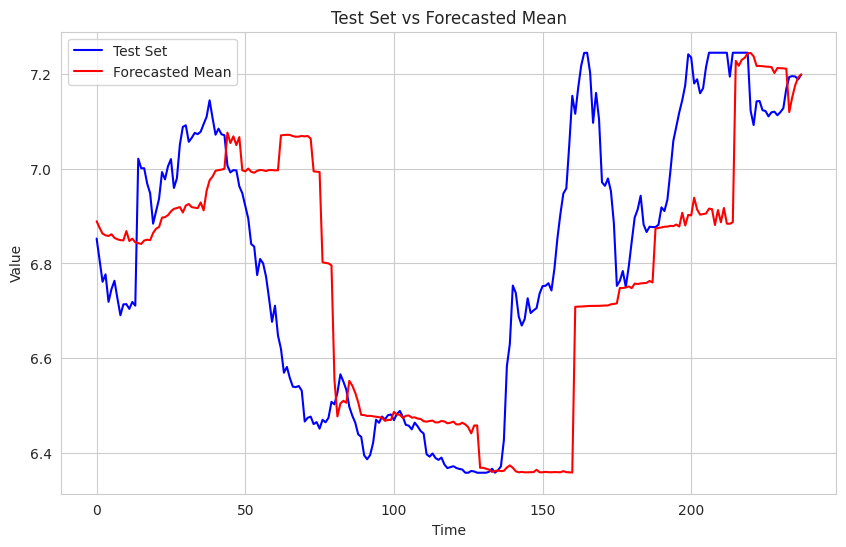

In [78]:
# Plotting
plt.figure(figsize=(10, 6))
plt.plot(test_set_list, label='Test Set', color='blue')
plt.plot(mu_list, label='Forecasted Mean', color='red')
plt.title('Test Set vs Forecasted Mean')
plt.xlabel('Time')
plt.ylabel('Value')
plt.legend()
plt.grid(True)
plt.show()

In [65]:
print(test_set_list)

[6.829327999999999, 6.835198, 6.877549999999999, 6.846286000000001, 6.821316, 6.82916, 6.847878, 6.84482, 6.8613219999999995, 6.881749999999999, 6.896102000000001, 6.91909, 6.935770000000001, 6.9400580000000005, 6.91464, 6.93697, 6.931839999999999, 6.9445179999999995, 6.86585, 6.8878900000000005, 6.892652, 6.8779875, 6.852483333333333, 6.806362, 6.761253999999999, 6.7769580000000005, 6.71888, 6.7458100000000005, 6.76341, 6.725969999999999, 6.6906099999999995, 6.713571999999999, 6.71405, 6.704044000000001, 6.718639999999999, 6.710850000000001, 7.0211, 7.001076, 7.00097, 6.9687600000000005, 6.948116000000001, 6.884086000000001, 6.91004, 6.936564, 6.993004000000001, 6.977508, 7.005172, 7.020359999999999, 6.95946, 6.979819999999999, 7.050738, 7.08844, 7.091728000000001, 7.056858, 7.065284, 7.075754000000001, 7.073032, 7.078214, 7.0943119999999995, 7.109748000000001, 7.14447, 7.106992, 7.071822, 7.084638, 7.072732, 7.070716, 7.006504, 6.992217999999999, 6.99709, 6.996474000000001, 6.962782,

In [45]:
print(model)

                     Constant Mean - GARCH Model Results                      
Dep. Variable:             weekly_ret   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:                38.8919
Distribution:                  Normal   AIC:                          -23.7838
Method:            Maximum Likelihood   BIC:                          0.256241
                                        No. Observations:                   18
Date:                Tue, Mar 19 2024   Df Residuals:                       17
Time:                        16:59:45   Df Model:                            1
                               Mean Model                               
                 coef    std err          t      P>|t|  95.0% Conf. Int.
------------------------------------------------------------------------
mu             7.1197  1.686e-02    422.223      0.000 [  7.087,  7.15

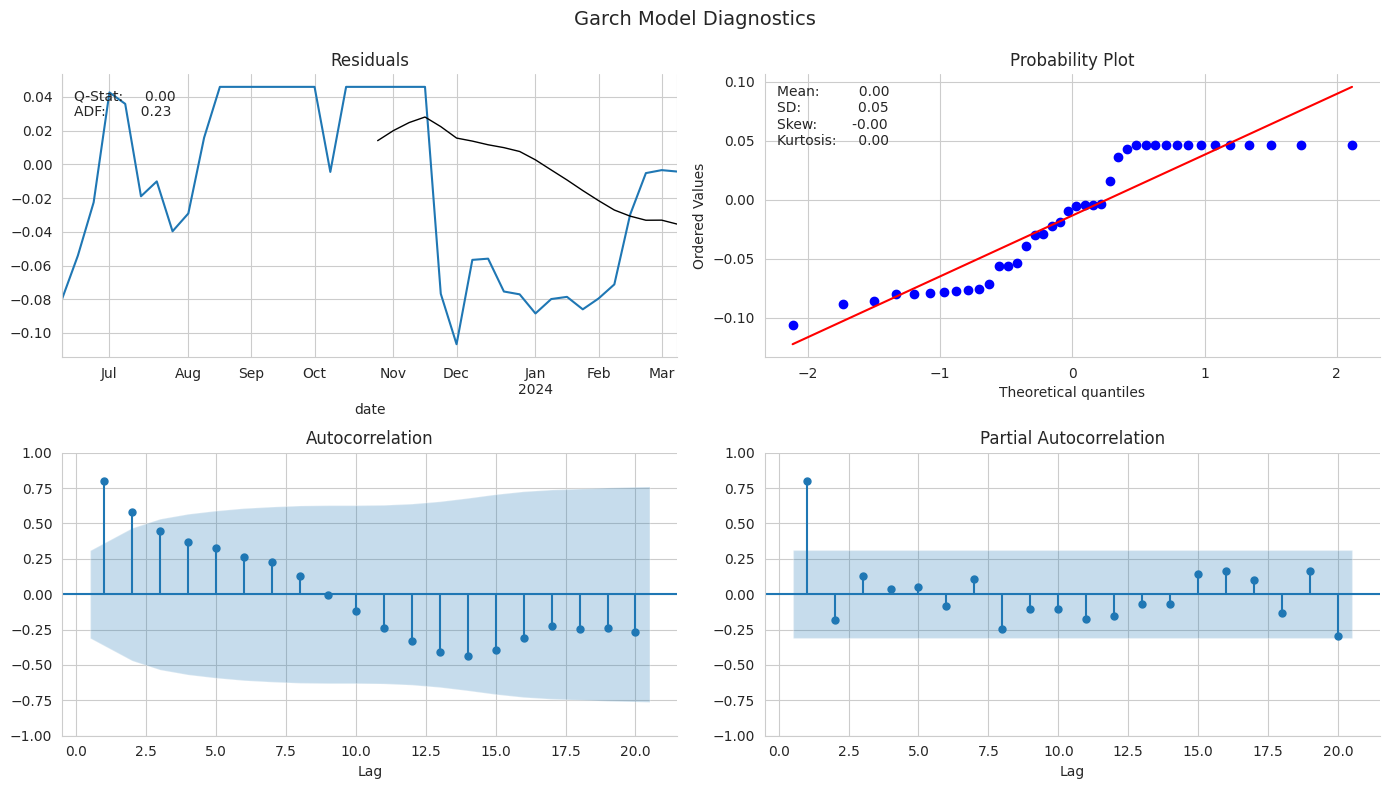

In [80]:
plot_correlogram(pd.Series(model.resid),
                 lags=20,
                 title=f'Garch Model Diagnostics')

## predict

In [107]:
best_p = 3
best_q = 8

In [108]:
t = T - 1
trainsize = 40
s = t - trainsize - 1
train_set = data.iloc[s: t]
model = arch_model(y=train_set, p=best_p, q=best_q).fit(disp='off')
print(model.summary)

<bound method ARCHModelResult.summary of                      Constant Mean - GARCH Model Results                      
Dep. Variable:             weekly_ret   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:                67.8157
Distribution:                  Normal   AIC:                          -109.631
Method:            Maximum Likelihood   BIC:                          -87.3550
                                        No. Observations:                   41
Date:                Tue, Mar 19 2024   Df Residuals:                       40
Time:                        17:29:11   Df Model:                            1
                               Mean Model                               
                 coef    std err          t      P>|t|  95.0% Conf. Int.
------------------------------------------------------------------------
mu             7.1912  3.091e

In [109]:
print(data)
print(T)
print(train_set)

date
2018-03-25    6.358066
2018-04-01    6.358066
2018-04-08    6.358066
2018-04-15    6.358066
2018-04-22    6.358066
                ...   
2024-02-25    7.193820
2024-03-03    7.195580
2024-03-10    7.194730
2024-03-17    7.188662
2024-03-24    7.198750
Name: weekly_ret, Length: 279, dtype: float64
279
date
2023-06-11    7.119220
2023-06-18    7.144870
2023-06-25    7.176460
2023-07-02    7.241680
2023-07-09    7.234890
2023-07-16    7.180060
2023-07-23    7.188898
2023-07-30    7.159300
2023-08-06    7.169880
2023-08-13    7.214820
2023-08-20    7.244976
2023-08-27    7.244976
2023-09-03    7.244976
2023-09-10    7.244976
2023-09-17    7.244976
2023-09-24    7.244976
2023-10-01    7.244976
2023-10-08    7.194512
2023-10-15    7.244976
2023-10-22    7.244976
2023-10-29    7.244976
2023-11-05    7.244976
2023-11-12    7.244976
2023-11-19    7.244976
2023-11-26    7.122240
2023-12-03    7.092312
2023-12-10    7.142342
2023-12-17    7.143060
2023-12-24    7.123580
2023-12-31    7.1219

### Analysis

we see the first three $\alpha_i$ coefficients are significant, whereas all the moving average $\beta_i$ coefficients are insignificant.

What this tells us may be that the predicted variance is determined mostly be error residual term (*weekly-close*) of the most recent $3$ weeks. (?)

In [110]:
forecast = model.forecast(horizon=1)
mu = forecast.mean
print(mu)

var = forecast.variance.iloc[-1, 0]
print(var)

                 h.1
date                
2024-03-17  7.191178
1.2972504207618772e-05
